# Zero down assignment

## Problem 2 : NATURAL HAZARDS - HURRICANES

### - Abinaya U (19PD02)

### Importing all the necessary libraries

In [73]:
import csv
from dbfread import DBF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Converting the dbf file to csv file

In [ ]:
def dbf_to_csv(dbf_table_pth):
    csv_fn = dbf_table_pth[:-4]+ ".csv" 
    table = DBF(dbf_table_pth)
    with open(csv_fn, 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(table.field_names)
        for record in table:#
            writer.writerow(list(record.values()))
    return csv_fn

In [8]:
dbf_to_csv("IBTrACS.ALL.list.v04r00.lines.dbf")

'IBTrACS.ALL.list.v04r00.lines.csv'

### Reading the csv file

In [58]:
df = pd.read_csv("IBTrACS.ALL.list.v04r00.lines.csv")

C:\Users\Abinaya_UB\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,21,61,66,128,143,148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEA_SE,USA_SEA_SW,USA_SEA_NW,STORM_SPD,STORM_DR,year,month,day,hour,min
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.90,80.30,...,NaN,NaN,NaN,9,266,1842,10,25,3,0
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.87,79.83,...,NaN,NaN,NaN,9,267,1842,10,25,6,0
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.84,79.35,...,NaN,NaN,NaN,9,267,1842,10,25,9,0
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.82,78.88,...,NaN,NaN,NaN,9,267,1842,10,25,12,0
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.80,78.40,...,NaN,NaN,NaN,9,268,1842,10,25,15,0


In [60]:
# Print the number of rows and columns in the data.
df.shape

(691516, 168)

In [61]:
# Print the columns in the dataset.
df.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'USA_SEA_SE', 'USA_SEA_SW', 'USA_SEA_NW', 'STORM_SPD', 'STORM_DR',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object', length=168)

In [62]:
# Print the datatypes of all the columns
df.dtypes

SID         object
SEASON       int64
NUMBER       int64
BASIN       object
SUBBASIN    object
             ...  
year         int64
month        int64
day          int64
hour         int64
min          int64
Length: 168, dtype: object

In [63]:
# Checking for missing values.
df.isnull().sum()

SID              0
SEASON           0
NUMBER           0
BASIN       122522
SUBBASIN     93427
             ...  
year             0
month            0
day              0
hour             0
min              0
Length: 168, dtype: int64

In [64]:
# removing the columns when the number of missing values are more than 350000(half of total rows in the dataset).
missing_values = dict(df.isnull().sum())
remain_list = []
for i in missing_values:
    if missing_values[i] != 0:
        if missing_values[i] >= 350000:
            df.drop(i, inplace = True, axis = 1)
        else:
            remain_list.append(i)
        print(i, " : ", missing_values[i])

BASIN  :  122522
SUBBASIN  :  93427
WMO_WIND  :  542761
WMO_PRES  :  540132
WMO_AGENCY  :  483607
USA_AGENCY  :  475377
USA_ATCFID  :  249525
USA_LAT  :  252726
USA_LON  :  252726
USA_RECORD  :  690240
USA_STATUS  :  453527
USA_WIND  :  315487
USA_PRES  :  548744
USA_R34_NE  :  630549
USA_R34_SE  :  631740
USA_R34_SW  :  635812
USA_R34_NW  :  633154
USA_R50_NE  :  659634
USA_R50_SE  :  660691
USA_R50_SW  :  662826
USA_R50_NW  :  661364
USA_R64_NE  :  671759
USA_R64_SE  :  672262
USA_R64_SW  :  673355
USA_R64_NW  :  672656
USA_POCI  :  600138
USA_ROCI  :  600525
USA_RMW  :  600603
USA_EYE  :  688057
TOK_LAT  :  565786
TOK_LON  :  565786
TOK_GRADE  :  565348
TOK_WIND  :  644905
TOK_PRES  :  565913
TOK_R50_DR  :  565348
TOK_R50_L  :  666286
TOK_R50_S  :  666302
TOK_R30_DR  :  565348
TOK_R30_L  :  644908
TOK_R30_S  :  644915
TOK_LAND  :  626016
CMA_LAT  :  558221
CMA_LON  :  558221
CMA_CAT  :  556889
CMA_WIND  :  569658
CMA_PRES  :  558364
HKO_LAT  :  612191
HKO_LON  :  612191
HKO_CAT  :  

In [68]:
# Remaining columns are replaced(or imputed) 
# using median, if the feature is numeric or 
# using mode, if the feature is categorical.
df['BASIN'] = df['BASIN'].astype(str)
df['SUBBASIN'] = df['SUBBASIN'].astype(str)
df['USA_ATCFID'] = df['USA_ATCFID'].astype(str)

df['BASIN'] = df['BASIN'].fillna(df['BASIN'].mode())
df['SUBBASIN'] = df['SUBBASIN'].fillna(df['SUBBASIN'].mode())
df['USA_ATCFID'] = df['USA_ATCFID'].fillna(df['USA_ATCFID'].mode())
df['USA_LAT'] = df['USA_LAT'].fillna(df['USA_LAT'].median())
df['USA_LON'] = df['USA_LON'].fillna(df['USA_LON'].median())
df['USA_WIND'] = df['USA_WIND'].fillna(df['USA_WIND'].median())

In [69]:
df.isnull().sum()

SID           0
SEASON        0
NUMBER        0
BASIN         0
SUBBASIN      0
NAME          0
ISO_TIME      0
NATURE        0
LAT           0
LON           0
TRACK_TYPE    0
DIST2LAND     0
LANDFALL      0
IFLAG         0
USA_ATCFID    0
USA_LAT       0
USA_LON       0
USA_WIND      0
USA_SSHS      0
NEW_CI        0
REU_TNUM      0
REU_CI        0
BOM_TNUM      0
BOM_CI        0
STORM_SPD     0
STORM_DR      0
year          0
month         0
day           0
hour          0
min           0
dtype: int64

**No missing values in the dataset.**

In [70]:
# Print the statistics of the dataset.
df.describe()

,SEASON,NUMBER,LAT,LON,DIST2LAND,LANDFALL,USA_LAT,USA_LON,USA_WIND,USA_SSHS,...,REU_CI,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,year,month,day,hour,min
count,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,...,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000,691516.000000
mean,1961.478903,49.680083,8.609336,60.296409,705.068596,689.518668,12.032457,50.783732,46.539969,-2.299614,...,-983.593814,-994.458882,-977.662005,9.815083,210.208445,1961.417705,6.986491,15.557792,10.583168,0.047499
std,41.755809,34.374962,20.361351,95.571681,664.239868,661.838251,15.581129,87.913834,20.769427,2.748142,...,126.844957,73.667711,147.692461,6.558222,105.735114,41.748721,3.357673,8.697592,6.918064,1.264967
min,1842.000000,1.000000,-68.010000,-179.750000,0.000000,0.000000,-48.840000,-358.500000,5.000000,-5.000000,...,-999.900000,-999.900000,-999.900000,0.000000,0.000000,1842.000000,1.000000,1.000000,0.000000,0.000000
25%,1935.000000,20.000000,-13.180000,-37.750000,169.000000,153.000000,12.400000,37.470000,40.000000,-5.000000,...,-999.900000,-999.900000,-999.900000,5.000000,120.000000,1935.000000,4.000000,8.000000,5.000000,0.000000
50%,1970.000000,45.000000,14.900000,90.540000,486.000000,469.000000,15.380000,77.000000,42.000000,-2.000000,...,-999.900000,-999.900000,-999.900000,9.000000,254.000000,1970.000000,8.000000,15.000000,11.000000,0.000000
75%,1994.000000,74.000000,22.310000,132.790000,1126.000000,1108.000000,18.110000,110.600000,45.000000,0.000000,...,-999.900000,-999.900000,-999.900000,12.000000,292.000000,1994.000000,9.000000,23.000000,18.000000,0.000000
max,2022.000000,167.000000,83.010000,266.900000,4833.000000,4814.000000,83.010000,180.000000,185.000000,5.000000,...,7.500000,7.500000,7.500000,148.000000,360.000000,2022.000000,12.000000,31.000000,23.000000,59.000000


In [71]:
# Prints the correlation(relationship) between all the attributes
df.corr()

,SEASON,NUMBER,LAT,LON,DIST2LAND,LANDFALL,USA_LAT,USA_LON,USA_WIND,USA_SSHS,...,REU_CI,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,year,month,day,hour,min
SEASON,1.000000,0.327146,-0.029953,0.059648,0.136248,0.136241,-0.194751,-0.029352,0.016737,0.425303,...,0.120182,0.080461,0.106077,0.045224,0.029601,0.999983,-0.001536,0.026869,-0.005179,0.021569
NUMBER,0.327146,1.000000,0.342109,-0.033980,0.096995,0.094894,0.212705,-0.075318,0.066944,0.240455,...,-0.053973,-0.043631,-0.048673,0.078498,0.062499,0.325309,0.772986,0.052984,-0.007783,-0.003670
LAT,-0.029953,0.342109,1.000000,-0.237468,-0.046425,-0.050882,0.728972,-0.249946,0.131702,0.218549,...,-0.158518,-0.085747,-0.177798,0.221927,-0.024561,-0.028225,0.580647,0.036225,-0.009405,-0.030617
LON,0.059648,-0.033980,-0.237468,1.000000,-0.024564,-0.026485,-0.269261,0.840617,-0.068601,-0.252650,...,0.006631,0.047804,0.093706,0.008307,-0.040080,0.059233,-0.157102,-0.007907,0.010850,0.010368
DIST2LAND,0.136248,0.096995,-0.046425,-0.024564,1.000000,0.999390,-0.040072,-0.027611,0.025221,0.121429,...,0.072152,-0.023655,-0.014394,0.075429,0.049458,0.135898,0.039816,-0.002884,-0.007780,-0.023685
LANDFALL,0.136241,0.094894,-0.050882,-0.026485,0.999390,1.000000,-0.043912,-0.029380,0.021749,0.119664,...,0.072434,-0.022993,-0.012754,0.064596,0.047501,0.135884,0.036931,-0.002858,-0.007613,-0.022675
USA_LAT,-0.194751,0.212705,0.728972,-0.269261,-0.040072,-0.043912,1.000000,-0.261100,0.124084,0.069863,...,-0.198393,-0.107792,-0.214114,0.173212,-0.044274,-0.193349,0.417061,0.010908,-0.006112,-0.031268
USA_LON,-0.029352,-0.075318,-0.249946,0.840617,-0.027611,-0.029380,-0.261100,1.000000,-0.061446,-0.227424,...,0.024082,0.053714,0.106900,-0.043587,-0.037873,-0.029853,-0.155518,-0.011208,0.006464,0.010270
USA_WIND,0.016737,0.066944,0.131702,-0.068601,0.025221,0.021749,0.124084,-0.061446,1.000000,0.544708,...,0.035060,0.009043,0.017558,0.068204,0.022211,0.017075,0.092991,0.004177,-0.001616,0.009990
USA_SSHS,0.425303,0.240455,0.218549,-0.252650,0.121429,0.119664,0.069863,-0.227424,0.544708,1.000000,...,0.086156,0.039758,0.051813,0.040440,0.087836,0.425793,0.176888,0.020426,-0.014262,0.007046


In [72]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,REU_CI,BOM_TNUM,BOM_CI,STORM_SPD,STORM_DR,year,month,day,hour,min
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.90,80.30,...,-999.9,-999.9,-999.9,9,266,1842,10,25,3,0
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.87,79.83,...,-999.9,-999.9,-999.9,9,267,1842,10,25,6,0
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.84,79.35,...,-999.9,-999.9,-999.9,9,267,1842,10,25,9,0
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.82,78.88,...,-999.9,-999.9,-999.9,9,267,1842,10,25,12,0
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.80,78.40,...,-999.9,-999.9,-999.9,9,268,1842,10,25,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691511,2022083S13076,2022,19,SI,MM,HALIMA,2022-03-30 15:00:00,NR,-19.61,82.35,...,-999.9,-999.9,-999.9,3,44,2022,3,30,15,0
691512,2022083S13076,2022,19,SI,MM,HALIMA,2022-03-30 18:00:00,NR,-19.50,82.50,...,-999.9,-999.9,-999.9,5,65,2022,3,30,18,0
691513,2022083S13076,2022,19,SI,MM,HALIMA,2022-03-30 21:00:00,NR,-19.40,82.84,...,-999.9,-999.9,-999.9,8,75,2022,3,30,21,0
691514,2022090N12109,2022,20,WP,MM,NOT_NAMED,2022-03-30 18:00:00,NR,12.30,109.20,...,-999.9,-999.9,-999.9,5,2,2022,3,30,18,0


## Data Visualization

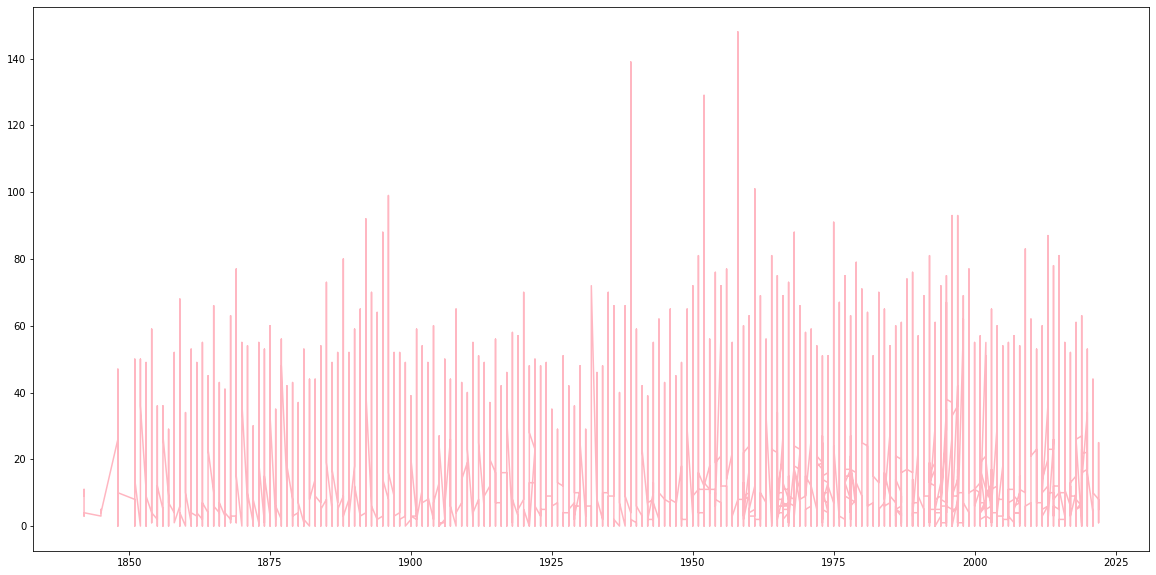

In [85]:
plt.figure(figsize = (20, 10))
plt.plot(df['year'], df['STORM_SPD'], color = "lightpink")

### During the years 1940, 1952, 1960, the storm speed at US was very high. After 2020, the storm speed is decreasing gradually.

In [87]:
# Categorizing hurricanes base on the storm speed
df_ = df.groupby(['NAME', 'STORM_SPD'])
df_.first()

SID  SEASON  NUMBER BASIN SUBBASIN  \
NAME  STORM_SPD                                                 
3-C   4          1992327N11206    1992     125    EP       CP   
      9          1992327N11206    1992     125    EP       CP   
      10         1992327N11206    1992     125    EP       CP   
      11         1992327N11206    1992     125    EP       CP   
      13         1992327N11206    1992     125    EP       CP   
...                        ...     ...     ...   ...      ...   
ZUMAN 33         1998087S15172    1998      21    SP       MM   
      36         1998087S15172    1998      21    SP       MM   
      41         1998087S15172    1998      21    SP       MM   
      42         1998087S15172    1998      21    SP       MM   
      48         1998087S15172    1998      21    SP       MM   

                            ISO_TIME NATURE    LAT     LON TRACK_TYPE  ...  \
NAME  STORM_SPD                                                        ...   
3-C   4          1992-11-22 21:00:00     TS  10.05 -156.67       main  ...   
      9          1992-11-22 00:00:00     TS  10.70 -154.10       main  ...   
      10         1992-11-22 06:00:00     TS  11.32 -154.80       main  ...   
      11         1992-11-22 12:00:00     TS  11.88 -155.50       main  ...   
      13         1992-11-22 18:00:00     TS  10.30 -156.43       main  ...   
...                              ...    ...    ...     ...        ...  ...   
ZUMAN 33         1998-04-06 03:00:00     TS -24.50  169.66       main  ...   
      36         1998-04-10 03:00:00     NR -46.63  188.28       main  ...   
      41         1998-04-09 12:00:00     NR -39.50  179.50       main  ...   
      42         1998-04-09 18:00:00     NR -43.50  183.00       main  ...   
      48         1998-04-09 15:00:00     NR -41.54  181.12       main  ...   

                 REU_TNUM  REU_CI BOM_TNUM BOM_CI  STORM_DR  year  month  day  \
NAME  STORM_SPD                                                                 
3-C   4            -999.9  -999.9   -999.9 -999.9       255  1992     11   22   
      9            -999.9  -999.9   -999.9 -999.9       307  1992     11   22   
      10           -999.9  -999.9   -999.9 -999.9       320  1992     11   22   
      11           -999.9  -999.9   -999.9 -999.9       233  1992     11   22   
      13           -999.9  -999.9   -999.9 -999.9       212  1992     11   22   
...                   ...     ...      ...    ...       ...   ...    ...  ...   
ZUMAN 33           -999.9  -999.9   -999.9 -999.9       147  1998      4    6   
      36           -999.9  -999.9   -999.9 -999.9       106  1998      4   10   
      41           -999.9  -999.9   -999.9 -999.9       152  1998      4    9   
      42           -999.9  -999.9   -999.9 -999.9       145  1998      4    9   
      48           -999.9  -999.9   -999.9 -999.9       147  1998      4    9   

                 hour  min  
NAME  STORM_SPD             
3-C   4            21    0  
      9             0    0  
      10            6    0  
      11           12    0  
      13           18    0  
...               ...  ...  
ZUMAN 33            3    0  
      36            3    0  
      41           12    0  
      42           18    0  
      48           15    0  

[40461 rows x 29 columns]